In [1]:
from groupy import config, Group, Bot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [12]:
# get group; if don't know group_id can filter by name (but name liable to change)
with open('groupy_key.txt', 'r') as f:
    key = f.read()
config.API_KEY = key
rip = Group.list().filter(group_id='13678029')[0] # rip city
# rip = Group.list().filter(group_id='24338846')[0] # stag city

In [13]:
# make a dict to go from user_ids to current name
rip_names = list(map(str, rip.members()))
rip_ids = list(map(lambda x: str(x.user_id), rip.members()))
rip_dict = dict(zip(rip_ids, rip_names))
# find and change accordingly
rip_dict['system'] = 'system'
# rip_dict['354536'] = 'ripbot'
rip_dict['356381'] = 'fitbot'

In [14]:
rip.message_count

18277

In [15]:
# get all messages (11,000+)
messages = rip.messages()
while messages.iolder():
    pass

In [16]:
# get info about messages
m_times = [m.created_at for m in messages]
m_users = [m.user_id for m in messages]
m_likes = [len(m.likes()) for m in messages]
m_text = [str(m.text).strip() for m in messages]

In [17]:
# put into dataframe
df = pd.DataFrame({'user_id':m_users}, index=m_times)
df['name'] = df['user_id'].map(rip_dict)
df['likes'] = m_likes
df['text'] = m_text
df['chars'] = df['text'].map(lambda x: len(x))

In [18]:
df.tail()

,user_id,name,likes,text,chars
2015-04-26 10:39:47,15629412,Duke,0,What up! Congrats to everybody!,31
2015-04-26 10:39:41,19837433,Austin Kelly,0,Help add people please,22
2015-04-26 10:39:21,9197895,Kyle Barton,0,Yo yo yo!,9
2015-04-26 10:39:12,9838844,Ben Whitenack,3,�,1
2015-04-26 10:36:49,system,system,1,"Austin Kelly added gilbert mcintire, Kyle Bart...",114


In [19]:
df.head()

,user_id,name,likes,text,chars
2017-06-27 16:17:03,14486891,Abe Weill,0,@Sam GK Maybe?,14
2017-06-27 16:13:21,18767351,Adam Odeh,1,I don't... sorry man,20
2017-06-27 16:12:58,14486891,Abe Weill,0,Does anyone have some cleats 13/14 I can borro...,54
2017-06-27 13:47:54,354536,NaN,0,"Core now has 137 points, most recently for TRX.",47
2017-06-27 13:47:44,24501903,fish,2,Core ++ TRX,11


In [20]:
# calc some stats
stats = pd.DataFrame({'messages':df['name'].value_counts()})
stats.index.rename('name', inplace=True)
sums = df.groupby(['name']).sum()

stats = stats.merge(sums, left_index=True, right_index=True)
stats['like_per_m'] = stats['likes'] / stats['messages']
stats['like_per_char'] = stats['likes'] / stats['chars']

In [21]:
num_m = stats['messages'].sum()
num_l = stats['likes'].sum()

In [22]:
stats['perc_m'] = stats['messages'] / num_m * 100
stats['perc_l'] = stats['likes'] / num_l * 100

In [28]:
stats.sort_values('like_per_m', ascending=False)

,messages,likes,chars,like_per_m,like_per_char,perc_m,perc_l
name,,,,,,,
Peter Woodside,58,140,4489,2.413793,0.031187,0.389706,1.000786
Roy,25,55,970,2.200000,0.056701,0.167977,0.393166
fish,80,172,2672,2.150000,0.064371,0.537526,1.229537
OG,38,73,1738,1.921053,0.042002,0.255325,0.521839
Jack Padon Here 4 Hangin,13,23,519,1.769231,0.044316,0.087348,0.164415
Jack Hochberg Here 4 Apologizing,95,167,4570,1.757895,0.036543,0.638312,1.193795
Patrick Beckett,202,306,7118,1.514851,0.042990,1.357253,2.187433
Tanner Marshall,55,78,3073,1.418182,0.025382,0.369549,0.557581
Jesse Debord,237,319,9663,1.345992,0.033013,1.592421,2.280363


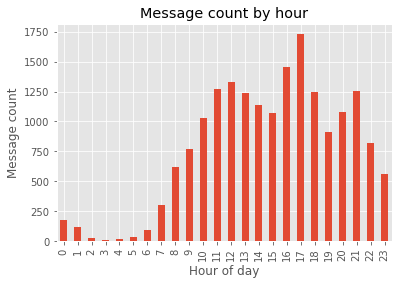

In [24]:
# do some plotting
ax = df.groupby([df.index.hour])['user_id'].count().plot(kind='bar')
ax.set_ylabel('Message count')
ax.set_xlabel('Hour of day')
ax.set_title('Message count by hour')

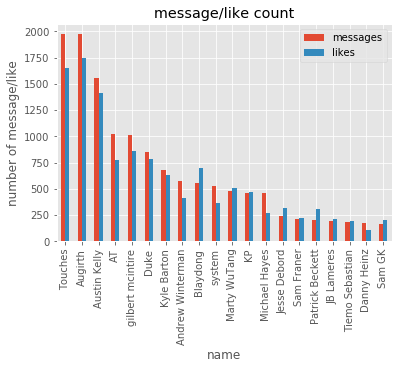

In [25]:
ax2 = stats[['messages', 'likes']].sort_values('messages', ascending=False).head(20).plot(kind='bar', stacked=False)
ax2.set_ylabel('number of message/like')
ax2.set_title('message/like count')